In [1]:
## Import required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

print("Data loaded successfully!")

Data loaded successfully!


In [2]:
# 1. Check basic information of the data
df = pd.read_csv('london_UK.csv')  
print("=== Basic Data Information ===")
print(f"Data shape: {df.shape}")  # Show number of rows and columns
print(f"\nColumn names: {df.columns.tolist()}")  # Display all column names

# 2. View first 5 rows of data
print("\n=== First 5 Rows of Data ===")
print(df.head())

# 3. View statistical summary of the data
print("\n=== Statistical Information for Numerical Data ===")
print(df.describe())

# 4. Check for missing values
print("\n=== Missing Values Check ===")
print(df.isnull().sum())

# 5. Check date range (important!)
print("\n=== Date Range ===")
if 'datetime' in df.columns:
    print(f"Start date: {df['datetime'].min()}")
    print(f"End date: {df['datetime'].max()}")
elif 'date' in df.columns:
    print(f"Start date: {df['date'].min()}")
    print(f"End date: {df['date'].max()}")
else:
    print("Please check the column names above to find the exact name of the date column")
    # Additional check for date columns
    date_columns = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
    if date_columns:
        print(f"Possible date columns: {date_columns}")

=== Basic Data Information ===
Data shape: (15, 33)

Column names: ['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations']

=== First 5 Rows of Data ===
        name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  London UK  2025-09-18     71.7     62.0  66.3          71.7          62.0   
1  London UK  2025-09-19     77.3     58.7  65.9          77.3          58.7   
2  London UK  2025-09-20     70.4     56.0  62.9          70.4          56.0   
3  London UK  2025-09-21     61.8     51.3  56.5          61.8          51.3   
4  London UK  2025-09-22     62.0     48.3  54.8          62.0          46.0   

   feels

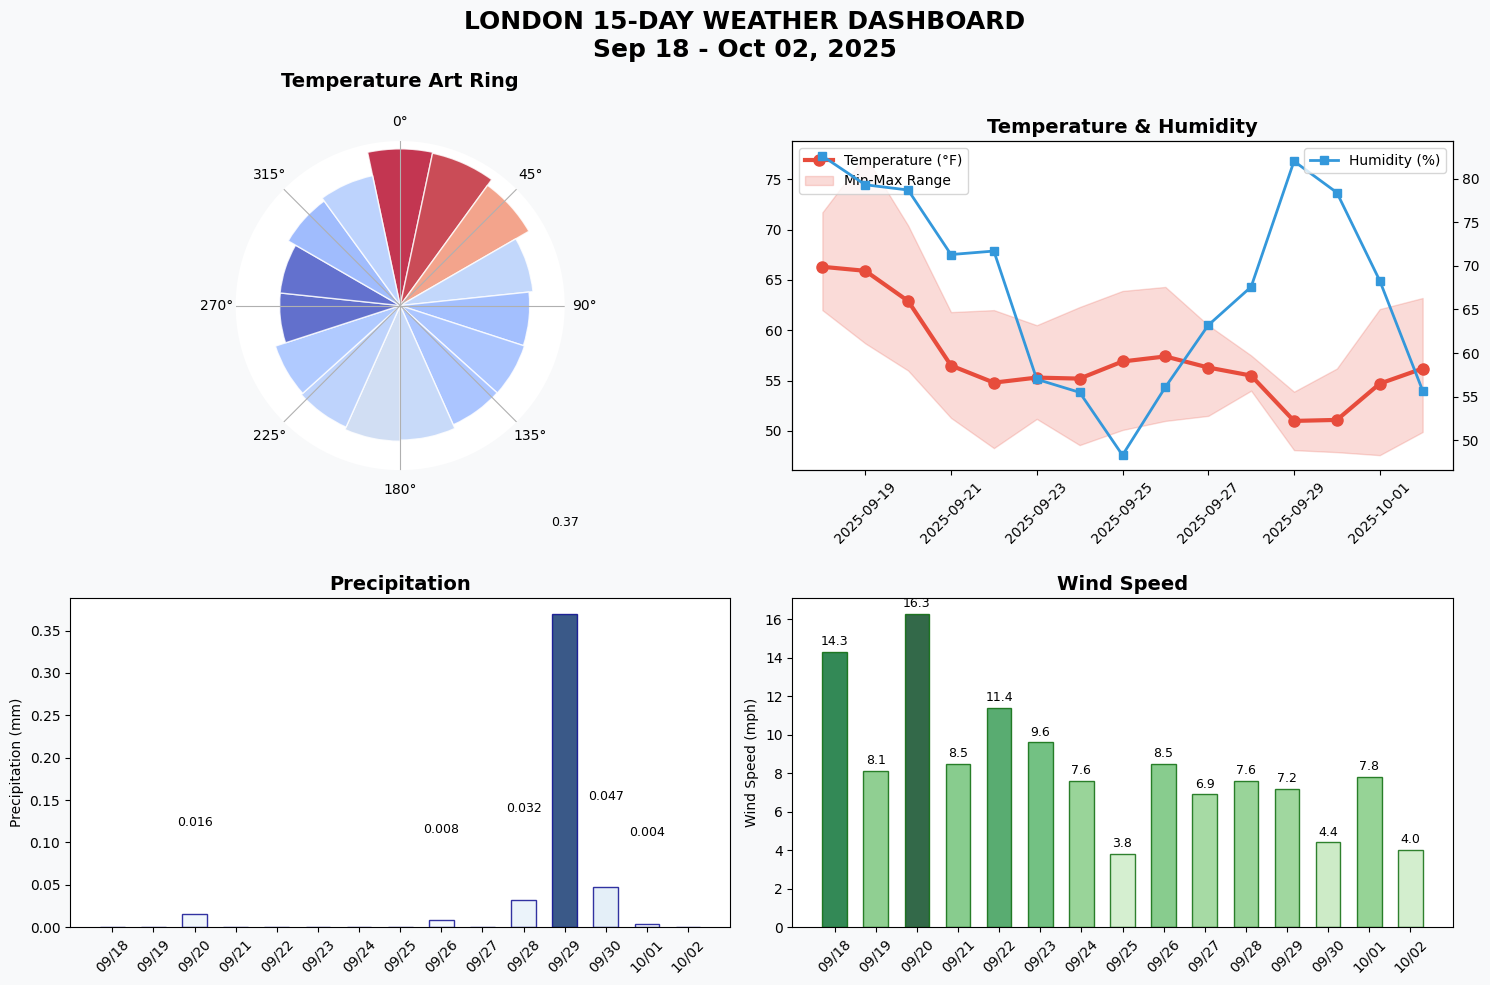

In [3]:
# Revised London 15-Day Weather Art Dashboard
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('default')

fig = plt.figure(figsize=(15, 10))
fig.patch.set_facecolor('#f8f9fa')

# Create 4 subplots
ax1 = plt.subplot(2, 2, 1, projection='polar')  # Temperature polar chart
ax2 = plt.subplot(2, 2, 2)  # Temperature & Humidity combo chart
ax3 = plt.subplot(2, 2, 3)  # Precipitation bar chart
ax4 = plt.subplot(2, 2, 4)  # Wind speed bar chart (revised to regular bar chart)

# Prepare data
dates = pd.to_datetime(df['datetime'])
temps = df['temp']
temp_max = df['tempmax']
temp_min = df['tempmin']
humidity = df['humidity']
precip = df['precip']
windspeed = df['windspeed']

# 1. Temperature Polar Art Chart (Top Left)
theta = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
colors_temp = plt.cm.coolwarm((temps - temps.min()) / (temps.max() - temps.min()))
bars = ax1.bar(theta, temps, width=2*np.pi/len(df), bottom=50, 
              color=colors_temp, alpha=0.8, edgecolor='white', linewidth=1)
ax1.set_theta_offset(np.pi / 2)
ax1.set_theta_direction(-1)
ax1.set_rticks([])
ax1.spines['polar'].set_visible(False)
ax1.set_title('Temperature Art Ring', fontsize=14, pad=20, fontweight='bold')

# 2. Temperature & Humidity Combo Chart (Top Right)
ax2.plot(dates, temps, 'o-', color='#e74c3c', linewidth=3, markersize=8, label='Temperature (°F)')
ax2.fill_between(dates, temp_min, temp_max, color='#e74c3c', alpha=0.2, label='Min-Max Range')
ax2_twin = ax2.twinx()
ax2_twin.plot(dates, humidity, 's-', color='#3498db', linewidth=2, markersize=6, label='Humidity (%)')
ax2.set_title('Temperature & Humidity', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')
ax2.tick_params(axis='x', rotation=45)

# 3. Precipitation Bar Chart (Bottom Left)
colors_rain = plt.cm.Blues(precip / precip.max() if precip.max() > 0 else precip)
bars_rain = ax3.bar(range(len(dates)), precip, color=colors_rain, alpha=0.8, 
                   edgecolor='darkblue', width=0.6)
ax3.set_title('Precipitation', fontsize=14, fontweight='bold')
ax3.set_ylabel('Precipitation (mm)')
ax3.set_xticks(range(len(dates)))
ax3.set_xticklabels([d.strftime('%m/%d') for d in dates], rotation=45)
# Add value labels
for i, value in enumerate(precip):
    if value > 0:
        ax3.text(i, value + 0.1, f'{value}', ha='center', va='bottom', fontsize=9)

# 4. Wind Speed Bar Chart (Bottom Right) - Revised to regular bar chart
colors_wind = plt.cm.Greens(windspeed / windspeed.max())
bars_wind = ax4.bar(range(len(dates)), windspeed, color=colors_wind, alpha=0.8, 
                   edgecolor='darkgreen', width=0.6)
ax4.set_title('Wind Speed', fontsize=14, fontweight='bold')
ax4.set_ylabel('Wind Speed (mph)')
ax4.set_xticks(range(len(dates)))
ax4.set_xticklabels([d.strftime('%m/%d') for d in dates], rotation=45)
# Add value labels
for i, value in enumerate(windspeed):
    ax4.text(i, value + 0.2, f'{value}', ha='center', va='bottom', fontsize=9)

# Add overall title
plt.suptitle('LONDON 15-DAY WEATHER DASHBOARD\nSep 18 - Oct 02, 2025', 
             fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

In [4]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd

# Prepare data
dates = pd.to_datetime(df['datetime'])
temps = df['temp']
n_days = len(dates)  # Get actual number of days
print(f"Number of data days: {n_days}")

norm_temps = (temps - temps.min()) / (temps.max() - temps.min())  # Normalize to 0-1

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('#000020')
ax.set_facecolor('#000020')
ax.set_xlim(0, n_days-1)  # Use actual number of days
ax.set_ylim(0, 1)

# Hide axes
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

# Create particles
n_particles = 100  # Reduce particle count for better performance
particles_x = np.random.rand(n_particles) * (n_days-1)
particles_y = np.random.rand(n_particles)
particles_size = np.random.uniform(20, 80, n_particles)
particles_alpha = np.random.uniform(0.3, 0.9, n_particles)

scatter = ax.scatter(particles_x, particles_y, s=particles_size, 
                    alpha=particles_alpha, cmap='coolwarm')

# Temperature curve
line, = ax.plot([], [], 'w-', linewidth=3, alpha=0.8)

# Date label
date_text = ax.text(0.5, 0.05, '', transform=ax.transAxes, 
                   ha='center', color='white', fontsize=16, fontweight='bold')

def update_particles(frame):
    current_frame = frame % n_days  # Ensure it doesn't exceed data range
    
    # Update temperature curve
    if current_frame > 0:
        x_data = np.linspace(0, current_frame, current_frame+1)
        y_data = norm_temps[:current_frame+1]
        line.set_data(x_data, y_data)
    
    # Update particle positions and colors
    new_positions = []
    new_colors = []
    
    for i in range(n_particles):
        # Particles move towards current temperature position
        target_y = norm_temps[current_frame]
        new_y = particles_y[i] + (target_y - particles_y[i]) * 0.1
        
        # Add some random motion to particles
        new_x = particles_x[i] + np.random.uniform(-0.2, 0.2)
        new_y += np.random.uniform(-0.05, 0.05)
        
        # Boundary check
        new_x = np.clip(new_x, 0, n_days-1)
        new_y = np.clip(new_y, 0, 1)
        
        particles_x[i] = new_x
        particles_y[i] = new_y
        new_positions.append([new_x, new_y])
        new_colors.append(plt.cm.coolwarm(new_y))
    
    # Update scatter plot
    scatter.set_offsets(new_positions)
    scatter.set_color(new_colors)
    
    # Update date text
    date_text.set_text(f'{dates[current_frame].strftime("%Y-%m-%d")} · {temps[current_frame]}°F')
    date_text.set_color(plt.cm.coolwarm(norm_temps[current_frame]))
    
    return scatter, line, date_text

print("Generating particle flow animation...")
particle_ani = FuncAnimation(fig, update_particles, frames=n_days*3, 
                            interval=200, blit=True, repeat=True)

plt.tight_layout()
plt.close(fig)
HTML(particle_ani.to_jshtml())

Number of data days: 15
Generating particle flow animation...


/var/folders/jc/0pz9lr7x321f4n3chjzdfy6r0000gn/T/ipykernel_1616/1813452254.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(particles_x, particles_y, s=particles_size,
